In [304]:
from sklearn.naive_bayes import GaussianNB # Import GaussianClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier#import KNN 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics for evaluation metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
from sklearn import model_selection
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import ttest_rel, wilcoxon

import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read and clean data

In [248]:
data = pd.read_csv("21henchen_games_data.csv")
data['white_ACPL'] = 0
data['black_ACPL'] = 0

In [249]:
for game in range(len(data)):
    
    evaluations = data['Evaluation'][game]
    evaluations = ast.literal_eval(evaluations) # Convert from string to dict

    white_CPL = 0 # CPL -> CentiPawn Loss
    black_CPL = 0
    white_move_count = 0
    black_move_count = 0

    for move_eval in evaluations:
        player = move_eval['player']
        centipawn_loss = move_eval['centipawn_loss']

        if player == 'White':
            white_CPL += centipawn_loss
            white_move_count += 1
        else:
            black_CPL += centipawn_loss
            black_move_count += 1
    white_ACPL = white_CPL // white_move_count if white_move_count > 0 else 0
    black_ACPL = black_CPL // black_move_count if black_move_count > 0 else 0

    data.loc[game, 'white_ACPL'] = white_ACPL
    data.loc[game, 'black_ACPL'] = black_ACPL

In [251]:
data

,Event,Site,Date,White,Black,Result,WhiteElo,BlackElo,ECO,Opening,Termination,Moves,Evaluation,white_ACPL,black_ACPL
0,ACLVB Open Chess Tournament - Round 1,Chess.com,2018.01.17,21chenhen,jamesst87,1-0,874,1074,B12,B12,21chenhen won by resignation,"['e2e4', 'c7c6', 'd2d4', 'd7d5', 'e4e5', 'c8f5...","[{'player': 'White', 'move_number': 1, 'move':...",36,84
1,Live Chess,Chess.com,2023.03.09,AshuL4,21chenhen,1/2-1/2,1578,1471,B34,B34,Game drawn by repetition,"['e2e4', 'c7c5', 'g1f3', 'g7g6', 'd2d4', 'c5d4...","[{'player': 'White', 'move_number': 1, 'move':...",54,41
2,Live Chess,Chess.com,2018.01.09,21chenhen,alton_mies,0-1,877,771,C00,C00,alton_mies won by checkmate,"['e2e4', 'd7d5', 'b1c3', 'e7e6', 'd1e2', 'f8d6...","[{'player': 'White', 'move_number': 1, 'move':...",110,54
3,Live Chess,Chess.com,2023.01.21,koza1987,21chenhen,1-0,1289,1290,B20,B20,koza1987 won on time,"['e2e4', 'c7c5', 'c2c4', 'g7g6', 'd2d3', 'f8g7...","[{'player': 'White', 'move_number': 1, 'move':...",46,53
4,Let's Play,Chess.com,2020.10.06,21chenhen,micktasty,1-0,851,777,A01,A01,21chenhen won on time,"['b2b3', 'c7c5', 'c1b2', 'e7e6', 'f2f4', 'c5c4...","[{'player': 'White', 'move_number': 1, 'move':...",28,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,Live Chess,Chess.com,2020.09.30,manuelperez2020,21chenhen,1-0,988,995,B12,B12,manuelperez2020 won by checkmate,"['d2d4', 'd7d5', 'b1c3', 'g8f6', 'f2f3', 'c7c6...","[{'player': 'White', 'move_number': 1, 'move':...",72,134
1512,Live Chess,Chess.com,2024.06.03,Bigwillicious,21chenhen,0-1,1437,1432,B00,B00,21chenhen won by resignation,"['e2e4', 'b7b6', 'f2f4', 'c8b7', 'e4e5', 'e7e6...","[{'player': 'White', 'move_number': 1, 'move':...",72,39
1513,Live Chess,Chess.com,2022.10.17,21chenhen,KingKullar,0-1,871,968,A01,A01,KingKullar won by checkmate,"['b2b3', 'd7d5', 'c1b2', 'b8c6', 'e2e3', 'e7e5...","[{'player': 'White', 'move_number': 1, 'move':...",106,87
1514,Live Chess,Chess.com,2024.05.20,21chenhen,Cesarcossani,1-0,1483,1414,A01,A01,21chenhen won by checkmate,"['b2b3', 'e7e5', 'c1b2', 'e5e4', 'f2f3', 'e4f3...","[{'player': 'White', 'move_number': 1, 'move':...",69,99


In [253]:
def get_result(row):
    if row['Result'] == '1-0':
        return 2  # White won
    elif row['Result'] == '0-1':
        return 0  # Black won
    elif row['Result'] == '1/2-1/2':
        return 1  # Draw

data['Result'] = data.apply(get_result, axis=1)

# Train models - 3 types

## First model set: These models aim to determine if all important features of my chess data creates strong models


### Decision Tree model

In [257]:
key_data = data[["WhiteElo","BlackElo","white_ACPL",'black_ACPL',"Result"]]

In [258]:
key_data

,WhiteElo,BlackElo,white_ACPL,black_ACPL,Result
0,874,1074,36,84,2
1,1578,1471,54,41,1
2,877,771,110,54,0
3,1289,1290,46,53,2
4,851,777,28,56,2
...,...,...,...,...,...
1511,988,995,72,134,2
1512,1437,1432,72,39,0
1513,871,968,106,87,0
1514,1483,1414,69,99,2


In [264]:
X = key_data[key_data.columns[:-1]] # Features
y = key_data['Result'] # Target variable

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=407) # 70/30 train test split

In [268]:
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_predDT = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_predDT)}")

Accuracy: 0.6989010989010989


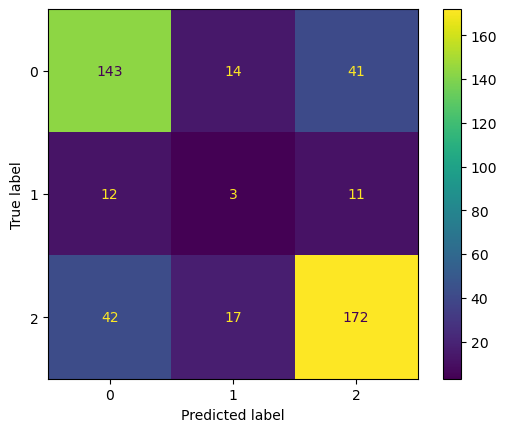

In [270]:
conf_mat = confusion_matrix(y_test, y_predDT)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [272]:
#evaluation metrics
print(metrics.classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       198
           1       0.09      0.12      0.10        26
           2       0.77      0.74      0.76       231

    accuracy                           0.70       455
   macro avg       0.53      0.53      0.53       455
weighted avg       0.71      0.70      0.70       455



### KNN model

In [275]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(key_data.drop('Result', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(key_data.drop('Result',axis=1))
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= key_data.columns[:-1])
#split dataset in features and target variable
X = data_feat
y = key_data['Result'] # Target variable
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

weightedChebKNN = KNeighborsClassifier(n_neighbors=3,weights='distance', metric='chebyshev')
weightedChebKNN .fit(X2_train,y2_train)
y_predKNN = weightedChebKNN .predict(X2_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_predKNN)) 

Accuracy: 0.7824175824175824


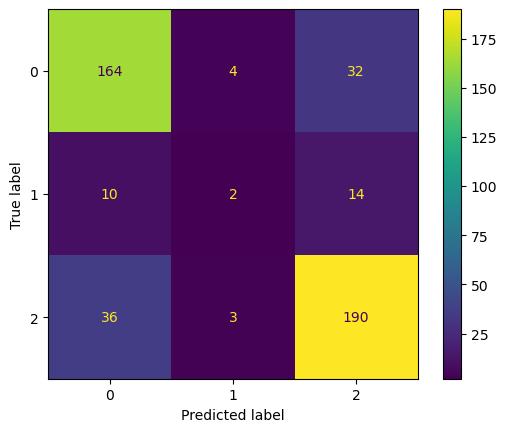

In [277]:
conf_mat = confusion_matrix(y2_test, y_predKNN)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [279]:
#evaluation metrics
print(metrics.classification_report(y2_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       200
           1       0.22      0.08      0.11        26
           2       0.81      0.83      0.82       229

    accuracy                           0.78       455
   macro avg       0.60      0.58      0.58       455
weighted avg       0.76      0.78      0.77       455



### Naïve Bayesian Classifier

In [282]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train model using the training sets
gnb.fit(X_train, y_train)

#predict the response for test dataset
y_predNB = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.7714285714285715


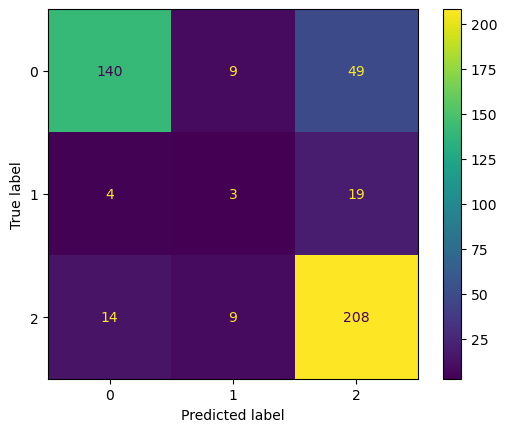

In [284]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predNB)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [286]:
#Look at the other results
print(metrics.classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       198
           1       0.14      0.12      0.13        26
           2       0.75      0.90      0.82       231

    accuracy                           0.77       455
   macro avg       0.59      0.57      0.58       455
weighted avg       0.78      0.77      0.77       455



### Cross validation

In [289]:
# Initialize the KFold cross-validator
kf = KFold(n_splits=10, shuffle = True, random_state = 1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print the results for training F1-Score
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
# Print the results for testing F1-Score
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}% ")

Training F1-Score (Mean): 1.0 (Std Dev: 0.0) CV: 0.0%
Testing F1-Score (Mean): 0.7386669966672251 (Std Dev: 0.04953292734637956) CV: 6.705718215361733% 


In [291]:
from sklearn.model_selection import cross_validate

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

# Perform cross-validation and get training and testing F1 scores
scoring = {'train_f1': 'f1_weighted', 'test_f1': 'f1_weighted'}
results = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True)
#print(results.keys()) #debugging
# Calculate mean and standard deviation for both training and testing F1 scores
train_f1_mean = results['train_train_f1'].mean()  
train_f1_std = results['train_train_f1'].std()

test_f1_mean = results['test_test_f1'].mean()  
test_f1_std = results['test_test_f1'].std()

# Print the mean, std, and CV for training and testing F1-scores
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_std/train_f1_mean * 100}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_std/test_f1_mean * 100}%")

Training F1-Score (Mean): 1.0 (Std Dev: 0.0) CV: 0.0%
Testing F1-Score (Mean): 0.7323486224377433 (Std Dev: 0.03822014887469712) CV: 5.218846284912101%


### Leave one out Cross Validation

In [294]:
# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in loo.split(X):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

 

Training F1-Score (Mean): 1.0 (Std Dev: 0.0) CV: 0.0%
Testing F1-Score (Mean): 0.7407651715039578 (Std Dev: 0.43821471014865515) CV: 59.15703478053083%


### Random Split

In [297]:
# Initialize the ShuffleSplit cross-validator
rs = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the random splits
for train_index, test_index in rs.split(X):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

Training F1-Score (Mean): 1.0 (Std Dev: 0.0) CV: 0.0%
Testing F1-Score (Mean): 0.735010592657569 (Std Dev: 0.019947848903574955) CV: 2.713953935201091%


### Grid Search

In [302]:
f1_scorer = make_scorer(f1_score, average='weighted')

# Standardize the data only for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],  # None means no limit
    'min_samples_split': [2, 5, 10]
}

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 41)),  # Test k values from 1 to 40
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Initialize the classifiers
decision_tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()

# Set up GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(estimator=decision_tree, 
                                param_grid=param_grid_tree, 
                                cv=5,  # 5-fold cross-validation
                                scoring=f1_scorer,  # Use F1-score as the metric
                                n_jobs=-1)  # Use all processors

# Set up GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn, 
                               param_grid=param_grid_knn, 
                               cv=5,  # 5-fold cross-validation
                               scoring=f1_scorer,  # Use F1-score as the metric
                               n_jobs=-1)  # Use all processors

# Perform the grid search for Decision Tree
grid_search_tree.fit(X_train, y_train)

# Perform the grid search for KNN
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best models
best_tree = grid_search_tree.best_estimator_
best_knn = grid_search_knn.best_estimator_

# Evaluate both models on the test set
y_pred_tree = best_tree.predict(X_test)
y_pred_knn = best_knn.predict(X_test_scaled)

# Calculate F1-scores on the test set
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the results
print(f"Best Decision Tree F1-Score on Test Set: {f1_tree}")
print(f"Best KNN F1-Score on Test Set: {f1_knn}")

# Print best hyperparameters
print(f"Best Decision Tree Parameters: {grid_search_tree.best_params_}")
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")

# Extract mean and standard deviation from cv_results_ for Decision Tree
tree_mean = grid_search_tree.cv_results_['mean_test_score'][grid_search_tree.best_index_]
tree_std = grid_search_tree.cv_results_['std_test_score'][grid_search_tree.best_index_]

# Extract mean and standard deviation from cv_results_ for KNN
knn_mean = grid_search_knn.cv_results_['mean_test_score'][grid_search_knn.best_index_]
knn_std = grid_search_knn.cv_results_['std_test_score'][grid_search_knn.best_index_]

# Print mean and standard deviation
print(f"Best Decision Tree CV Mean F1-Score: {tree_mean} (Std Dev: {tree_std})  CV: {tree_std/tree_mean}")
print(f"Best KNN CV Mean F1-Score: {knn_mean} (Std Dev: {knn_std}) CV: {knn_std/knn_mean}")

Best Decision Tree F1-Score on Test Set: 0.7814266131481142
Best KNN F1-Score on Test Set: 0.8012479611201028
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best KNN Parameters: {'metric': 'chebyshev', 'n_neighbors': 18, 'weights': 'uniform'}
Best Decision Tree CV Mean F1-Score: 0.7545902765767123 (Std Dev: 0.014027346288192372)  CV: 0.018589354678447596
Best KNN CV Mean F1-Score: 0.7936108453341 (Std Dev: 0.020471548301035813) CV: 0.025795449270123765


### Constructing Best DT and CNN Model

In [310]:
# Best hyperparameters from Grid Search
best_tree_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
best_knn_params = {'metric': 'chebyshev', 'n_neighbors': 18, 'weights': 'uniform'}

# Initialize the models with the best hyperparameters
best_tree = DecisionTreeClassifier(**best_tree_params, random_state=1)
best_knn = KNeighborsClassifier(**best_knn_params)

# Use weighted F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation (5-fold CV here) and collect F1-scores for both models
# For KNN, use the standardized dataset (X_train_scaled)
f1_scores_tree = cross_val_score(best_tree, X, y, cv=5, scoring=f1_scorer)
f1_scores_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validated F1-scores
print(f"Decision Tree F1-scores: {f1_scores_tree}")
print(f"KNN F1-scores: {f1_scores_knn}")

# Compute the mean and standard deviation of the F1-scores
print(f"Decision Tree F1-Score Mean: {np.mean(f1_scores_tree):.4f}, Std Dev: {np.std(f1_scores_tree):.4f} CV: { np.std(f1_scores_tree)/np.mean(f1_scores_tree)*100:.4f}%")
print(f"KNN F1-Score Mean: {np.mean(f1_scores_knn):.4f}, Std Dev: {np.std(f1_scores_knn):.4f} CV: {np.std(f1_scores_knn)/np.mean(f1_scores_knn)*100:.4f}%")

# Perform a paired t-test (parametric test) to see if there's a significant difference
t_stat, p_value_t = ttest_rel(f1_scores_tree, f1_scores_knn)
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")

# Perform the Wilcoxon signed-rank test (non-parametric test)
w_stat, p_value_w = wilcoxon(f1_scores_tree, f1_scores_knn)
print(f"Wilcoxon signed-rank test: W-statistic = {w_stat:.4f}, p-value = {p_value_w:.4f}")

Decision Tree F1-scores: [0.784235  0.7605498 0.7761701 0.7634448 0.8004578]
KNN F1-scores: [0.77962966 0.80325874 0.77133955 0.78503903 0.82878725]
Decision Tree F1-Score Mean: 0.7770, Std Dev: 0.0145 CV: 1.8719%
KNN F1-Score Mean: 0.7936, Std Dev: 0.0205 CV: 2.5795%
Paired t-test: t-statistic = -1.7772, p-value = 0.1502
Wilcoxon signed-rank test: W-statistic = 3.0000, p-value = 0.3125


#### Discussion of results from each model: WIP

## Second model set: This model aims to determine whether using only player Elo ratings is more effective for training than using both player Elo ratings and player ACPL. 

In [200]:
elo_data = key_data[["WhiteElo","BlackElo","Result"]]

In [204]:
elo_data # see if all looks good here

,WhiteElo,BlackElo,Result
0,874,1074,2
1,1578,1471,1
2,877,771,0
3,1289,1290,2
4,851,777,2
...,...,...,...
1511,988,995,2
1512,1437,1432,0
1513,871,968,0
1514,1483,1414,2


In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=407) # 70/30 train test split

### DT Model

In [316]:
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_predDT = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_predDT)}")

Accuracy: 0.701098901098901


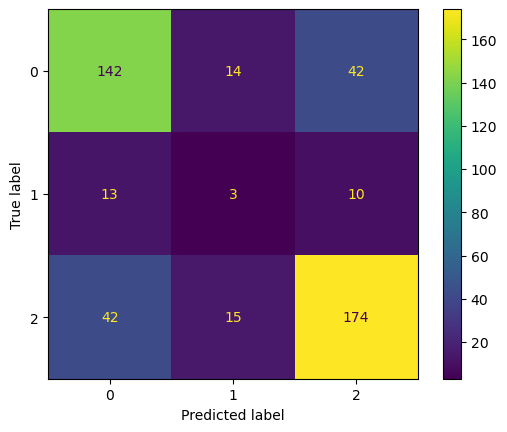

In [318]:
conf_mat = confusion_matrix(y_test, y_predDT)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [334]:
#evaluation metrics
print(metrics.classification_report(y2_test,y_predDT))

              precision    recall  f1-score   support

           0       0.43      0.42      0.42       200
           1       0.00      0.00      0.00        26
           2       0.49      0.48      0.48       229

    accuracy                           0.43       455
   macro avg       0.30      0.30      0.30       455
weighted avg       0.43      0.43      0.43       455



### KNN Model

In [328]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(elo_data.drop('Result', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(elo_data.drop('Result',axis=1))
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= elo_data.columns[:-1])
#split dataset in features and target variable
X = data_feat
y = elo_data['Result'] # Target variable
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

weightedChebKNN = KNeighborsClassifier(n_neighbors=10,weights='distance', metric='chebyshev')
weightedChebKNN .fit(X2_train,y2_train)
y_predKNN = weightedChebKNN .predict(X2_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_predKNN)) 

Accuracy: 0.6703296703296703


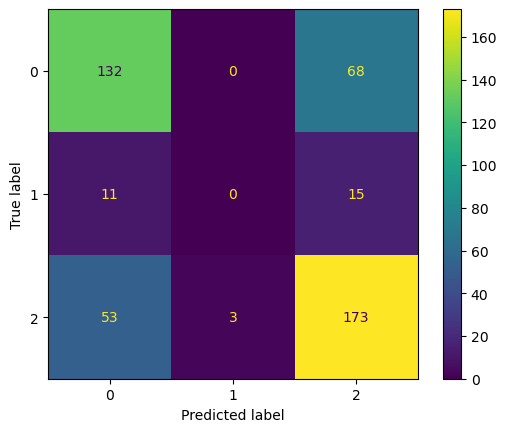

In [330]:
conf_mat = confusion_matrix(y2_test, y_predKNN)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [332]:
#evaluation metrics
print(metrics.classification_report(y2_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       200
           1       0.00      0.00      0.00        26
           2       0.68      0.76      0.71       229

    accuracy                           0.67       455
   macro avg       0.45      0.47      0.46       455
weighted avg       0.64      0.67      0.65       455



### Cross validation

In [339]:
# Initialize the KFold cross-validator
kf = KFold(n_splits=10, shuffle = True, random_state = 1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print the results for training F1-Score
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
# Print the results for testing F1-Score
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}% ")

Training F1-Score (Mean): 0.9870314224095063 (Std Dev: 0.001228084977184568) CV: 0.12442207505274862%
Testing F1-Score (Mean): 0.5568616434425804 (Std Dev: 0.027070084748895915) CV: 4.861186807829975% 


In [344]:
# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

# Perform cross-validation and get training and testing F1 scores
scoring = {'train_f1': 'f1_weighted', 'test_f1': 'f1_weighted'}
results = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True)
#print(results.keys()) #debugging
# Calculate mean and standard deviation for both training and testing F1 scores
train_f1_mean = results['train_train_f1'].mean()  
train_f1_std = results['train_train_f1'].std()

test_f1_mean = results['test_test_f1'].mean()  
test_f1_std = results['test_test_f1'].std()

# Print the mean, std, and CV for training and testing F1-scores
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_std/train_f1_mean * 100}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_std/test_f1_mean * 100}%")

Training F1-Score (Mean): 0.9870308258733121 (Std Dev: 0.001397369466093238) CV: 0.1415730319118315%
Testing F1-Score (Mean): 0.552600451675569 (Std Dev: 0.03326243250500635) CV: 6.019255395856006%


### Leave one out cross validation

In [346]:
# Initialize the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in skf.split(X, y):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

Training F1-Score (Mean): 0.9871034546417039 (Std Dev: 0.0007477291042353561) CV: 0.07574982143150989%
Testing F1-Score (Mean): 0.561996002255438 (Std Dev: 0.035509155520988316) CV: 6.31840002037038%


### Random Split

In [349]:
# Initialize the ShuffleSplit cross-validator
rs = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the random splits
for train_index, test_index in rs.split(X):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

Training F1-Score (Mean): 0.990106160274471 (Std Dev: 0.0018018390516072738) CV: 0.18198442994312644%
Testing F1-Score (Mean): 0.5641590912019959 (Std Dev: 0.021638772323480177) CV: 3.8355798321669625%


### Grid Search

In [352]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Define the F1-score metric for GridSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Standardize the data only for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],  # None means no limit
    'min_samples_split': [2, 5, 10]
}

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 41)),  # Test k values from 1 to 40
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Initialize the classifiers
decision_tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()

# Set up GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(estimator=decision_tree, 
                                param_grid=param_grid_tree, 
                                cv=5,  # 5-fold cross-validation
                                scoring=f1_scorer,  # Use F1-score as the metric
                                n_jobs=-1)  # Use all processors

# Set up GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn, 
                               param_grid=param_grid_knn, 
                               cv=5,  # 5-fold cross-validation
                               scoring=f1_scorer,  # Use F1-score as the metric
                               n_jobs=-1)  # Use all processors

# Perform the grid search for Decision Tree
grid_search_tree.fit(X_train, y_train)

# Perform the grid search for KNN
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best models
best_tree = grid_search_tree.best_estimator_
best_knn = grid_search_knn.best_estimator_

# Evaluate both models on the test set
y_pred_tree = best_tree.predict(X_test)
y_pred_knn = best_knn.predict(X_test_scaled)

# Calculate F1-scores on the test set
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the results
print(f"Best Decision Tree F1-Score on Test Set: {f1_tree}")
print(f"Best KNN F1-Score on Test Set: {f1_knn}")

# Print best hyperparameters
print(f"Best Decision Tree Parameters: {grid_search_tree.best_params_}")
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")

# Extract mean and standard deviation from cv_results_ for Decision Tree
tree_mean = grid_search_tree.cv_results_['mean_test_score'][grid_search_tree.best_index_]
tree_std = grid_search_tree.cv_results_['std_test_score'][grid_search_tree.best_index_]

# Extract mean and standard deviation from cv_results_ for KNN
knn_mean = grid_search_knn.cv_results_['mean_test_score'][grid_search_knn.best_index_]
knn_std = grid_search_knn.cv_results_['std_test_score'][grid_search_knn.best_index_]

# Print mean and standard deviation
print(f"Best Decision Tree CV Mean F1-Score: {tree_mean} (Std Dev: {tree_std})  CV: {tree_std/tree_mean}")
print(f"Best KNN CV Mean F1-Score: {knn_mean} (Std Dev: {knn_std}) CV: {knn_std/knn_mean}")

Best Decision Tree F1-Score on Test Set: 0.575566366145659
Best KNN F1-Score on Test Set: 0.6504232462215656
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}
Best Decision Tree CV Mean F1-Score: 0.5866331208257624 (Std Dev: 0.02429763318675388)  CV: 0.04141878854803118
Best KNN CV Mean F1-Score: 0.6211802574280619 (Std Dev: 0.011428891086728746) CV: 0.018398670836785747


### Building the best DT and KNN models

In [355]:
# Best hyperparameters from Grid Search
best_tree_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
best_knn_params = {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}

# Initialize the models with the best hyperparameters
best_tree = DecisionTreeClassifier(**best_tree_params, random_state=1)
best_knn = KNeighborsClassifier(**best_knn_params)

# Use weighted F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation (5-fold CV here) and collect F1-scores for both models
# For KNN, use the standardized dataset (X_train_scaled)
f1_scores_tree = cross_val_score(best_tree, X, y, cv=5, scoring=f1_scorer)
f1_scores_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validated F1-scores
print(f"Decision Tree F1-scores: {f1_scores_tree}")
print(f"KNN F1-scores: {f1_scores_knn}")

# Compute the mean and standard deviation of the F1-scores
print(f"Decision Tree F1-Score Mean: {np.mean(f1_scores_tree):.4f}, Std Dev: {np.std(f1_scores_tree):.4f} CV: { np.std(f1_scores_tree)/np.mean(f1_scores_tree)*100:.4f}%")
print(f"KNN F1-Score Mean: {np.mean(f1_scores_knn):.4f}, Std Dev: {np.std(f1_scores_knn):.4f} CV: {np.std(f1_scores_knn)/np.mean(f1_scores_knn)*100:.4f}%")

# Perform a paired t-test (parametric test) to see if there's a significant difference
t_stat, p_value_t = ttest_rel(f1_scores_tree, f1_scores_knn)
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")

# Perform the Wilcoxon signed-rank test (non-parametric test)
w_stat, p_value_w = wilcoxon(f1_scores_tree, f1_scores_knn)
print(f"Wilcoxon signed-rank test: W-statistic = {w_stat:.4f}, p-value = {p_value_w:.4f}")

Decision Tree F1-scores: [0.56643243 0.55016513 0.63072203 0.5677205  0.55578061]
KNN F1-scores: [0.62026621 0.63528002 0.60188156 0.61865397 0.62981952]
Decision Tree F1-Score Mean: 0.5742, Std Dev: 0.0290 CV: 5.0562%
KNN F1-Score Mean: 0.6212, Std Dev: 0.0114 CV: 1.8399%
Paired t-test: t-statistic = -2.3511, p-value = 0.0784
Wilcoxon signed-rank test: W-statistic = 1.0000, p-value = 0.1250


#### Discussion of results

## Third model set: This model aims to determine whether using only player ACPL ratings is more effective for training than using both player Elo ratings and player ACPL. 

In [361]:
acpl_data = key_data[["white_ACPL","black_ACPL","Result"]]

In [365]:
acpl_data # all looks good

,white_ACPL,black_ACPL,Result
0,36,84,2
1,54,41,1
2,110,54,0
3,46,53,2
4,28,56,2
...,...,...,...
1511,72,134,2
1512,72,39,0
1513,106,87,0
1514,69,99,2


In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=407) # 70/30 train test split

### Naïve Bayesian Classifier

In [370]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train model using the training sets
gnb.fit(X_train, y_train)

#predict the response for test dataset
y_predNB = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.5428571428571428


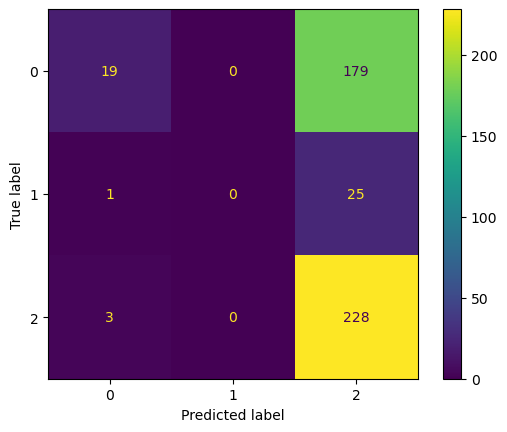

In [372]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predNB)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [377]:
#Look at the other results
print(metrics.classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.83      0.10      0.17       198
           1       0.00      0.00      0.00        26
           2       0.53      0.99      0.69       231

    accuracy                           0.54       455
   macro avg       0.45      0.36      0.29       455
weighted avg       0.63      0.54      0.42       455



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Discision Tree

In [380]:
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_predDT = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_predDT)}")

Accuracy: 0.5582417582417583


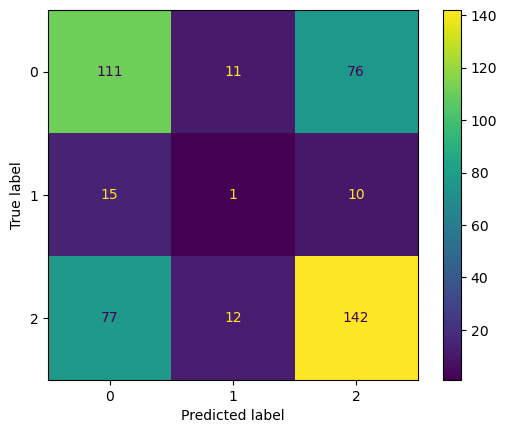

In [382]:
conf_mat = confusion_matrix(y_test, y_predDT)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

### KNN

In [387]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(acpl_data.drop('Result', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(acpl_data.drop('Result',axis=1))
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= acpl_data.columns[:-1])
#split dataset in features and target variable
X = data_feat
y = data['Result'] # Target variable
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

weightedChebKNN = KNeighborsClassifier(n_neighbors=3,weights='distance', metric='chebyshev')
weightedChebKNN .fit(X2_train,y2_train)
y_predKNN = weightedChebKNN.predict(X2_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_predKNN)) 

Accuracy: 0.7648351648351648


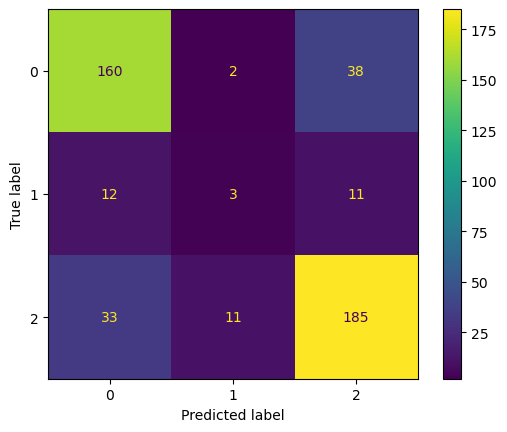

In [389]:
conf_mat = confusion_matrix(y2_test, y_predKNN)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

### Cross validation

In [392]:
# Initialize the KFold cross-validator
kf = KFold(n_splits=10, shuffle = True, random_state = 1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print the results for training F1-Score
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
# Print the results for testing F1-Score
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}% ")

Training F1-Score (Mean): 0.9891659423211069 (Std Dev: 0.0012162718853966584) CV: 0.12295933708985582%
Testing F1-Score (Mean): 0.7222641854392288 (Std Dev: 0.040266375814892674) CV: 5.575020418658248% 


In [394]:

model = DecisionTreeClassifier(random_state=1)

# Perform cross-validation and get training and testing F1 scores
scoring = {'train_f1': 'f1_weighted', 'test_f1': 'f1_weighted'}
results = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True)
#print(results.keys()) #debugging
# Calculate mean and standard deviation for both training and testing F1 scores
train_f1_mean = results['train_train_f1'].mean()  
train_f1_std = results['train_train_f1'].std()

test_f1_mean = results['test_test_f1'].mean()  
test_f1_std = results['test_test_f1'].std()

# Print the mean, std, and CV for training and testing F1-scores
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_std/train_f1_mean * 100}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_std/test_f1_mean * 100}%")


Training F1-Score (Mean): 0.989238681792371 (Std Dev: 0.0009261930932659555) CV: 0.09362685773546733%
Testing F1-Score (Mean): 0.7391950856688168 (Std Dev: 0.037781953764592174) CV: 5.111229024257841%


### Leave one out cross validation

In [399]:
# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the folds manually
for train_index, test_index in loo.split(X):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

Training F1-Score (Mean): 0.9881426682114468 (Std Dev: 9.61359477123885e-05) CV: 0.00972895420925361%
Testing F1-Score (Mean): 0.7295514511873351 (Std Dev: 0.44419154793600973) CV: 60.885568415098625%


### Random Split

In [402]:
# Initialize the ShuffleSplit cross-validator
rs = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)

# Initialize the model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=1)

train_f1_scores = []
test_f1_scores = []

# Loop through the random splits
for train_index, test_index in rs.split(X):
    # Use .iloc if X and y are DataFrames/Series, else use standard indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Get predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and testing F1-score (weighted for multi-class)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Calculate statistics for training F1-Score
train_f1_mean = np.mean(train_f1_scores)
train_f1_std = np.std(train_f1_scores)
train_f1_cv = (train_f1_std / train_f1_mean) * 100

# Calculate statistics for testing F1-Score
test_f1_mean = np.mean(test_f1_scores)
test_f1_std = np.std(test_f1_scores)
test_f1_cv = (test_f1_std / test_f1_mean) * 100

# Print results for Training and Testing F1-Score in one line
print(f"Training F1-Score (Mean): {train_f1_mean} (Std Dev: {train_f1_std}) CV: {train_f1_cv}%")
print(f"Testing F1-Score (Mean): {test_f1_mean} (Std Dev: {test_f1_std}) CV: {test_f1_cv}%")

Training F1-Score (Mean): 0.9909668590416892 (Std Dev: 0.0015343937115424573) CV: 0.15483804504080864%
Testing F1-Score (Mean): 0.7253181607875928 (Std Dev: 0.01575625221938341) CV: 2.1723228606704605%


### Grid search

In [405]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Define the F1-score metric for GridSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Standardize the data only for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],  # None means no limit
    'min_samples_split': [2, 5, 10]
}

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 41)),  # Test k values from 1 to 40
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Initialize the classifiers
decision_tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()

# Set up GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(estimator=decision_tree, 
                                param_grid=param_grid_tree, 
                                cv=5,  # 5-fold cross-validation
                                scoring=f1_scorer,  # Use F1-score as the metric
                                n_jobs=-1)  # Use all processors

# Set up GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn, 
                               param_grid=param_grid_knn, 
                               cv=5,  # 5-fold cross-validation
                               scoring=f1_scorer,  # Use F1-score as the metric
                               n_jobs=-1)  # Use all processors

# Perform the grid search for Decision Tree
grid_search_tree.fit(X_train, y_train)

# Perform the grid search for KNN
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best models
best_tree = grid_search_tree.best_estimator_
best_knn = grid_search_knn.best_estimator_

# Evaluate both models on the test set
y_pred_tree = best_tree.predict(X_test)
y_pred_knn = best_knn.predict(X_test_scaled)

# Calculate F1-scores on the test set
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the results
print(f"Best Decision Tree F1-Score on Test Set: {f1_tree}")
print(f"Best KNN F1-Score on Test Set: {f1_knn}")

# Print best hyperparameters
print(f"Best Decision Tree Parameters: {grid_search_tree.best_params_}")
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")

# Extract mean and standard deviation from cv_results_ for Decision Tree
tree_mean = grid_search_tree.cv_results_['mean_test_score'][grid_search_tree.best_index_]
tree_std = grid_search_tree.cv_results_['std_test_score'][grid_search_tree.best_index_]

# Extract mean and standard deviation from cv_results_ for KNN
knn_mean = grid_search_knn.cv_results_['mean_test_score'][grid_search_knn.best_index_]
knn_std = grid_search_knn.cv_results_['std_test_score'][grid_search_knn.best_index_]

# Print mean and standard deviation
print(f"Best Decision Tree CV Mean F1-Score: {tree_mean} (Std Dev: {tree_std})  CV: {tree_std/tree_mean}")
print(f"Best KNN CV Mean F1-Score: {knn_mean} (Std Dev: {knn_std}) CV: {knn_std/knn_mean}")

Best Decision Tree F1-Score on Test Set: 0.7753115338456362
Best KNN F1-Score on Test Set: 0.7763484331334018
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}
Best Decision Tree CV Mean F1-Score: 0.7789770602934277 (Std Dev: 0.022558260907689223)  CV: 0.028958825692751336
Best KNN CV Mean F1-Score: 0.8052447275997385 (Std Dev: 0.02757949520883768) CV: 0.03424983022372121


### Best DT and KNN models

In [408]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import ttest_rel, wilcoxon
import numpy as np

# Best hyperparameters from Grid Search
best_tree_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
best_knn_params = {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}

# Initialize the models with the best hyperparameters
best_tree = DecisionTreeClassifier(**best_tree_params, random_state=1)
best_knn = KNeighborsClassifier(**best_knn_params)

# Use weighted F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation (5-fold CV here) and collect F1-scores for both models
# For KNN, use the standardized dataset (X_train_scaled)
f1_scores_tree = cross_val_score(best_tree, X, y, cv=5, scoring=f1_scorer)
f1_scores_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validated F1-scores
print(f"Decision Tree F1-scores: {f1_scores_tree}")
print(f"KNN F1-scores: {f1_scores_knn}")

# Compute the mean and standard deviation of the F1-scores
print(f"Decision Tree F1-Score Mean: {np.mean(f1_scores_tree):.4f}, Std Dev: {np.std(f1_scores_tree):.4f} CV: { np.std(f1_scores_tree)/np.mean(f1_scores_tree)*100:.4f}%")
print(f"KNN F1-Score Mean: {np.mean(f1_scores_knn):.4f}, Std Dev: {np.std(f1_scores_knn):.4f} CV: {np.std(f1_scores_knn)/np.mean(f1_scores_knn)*100:.4f}%")

# Perform a paired t-test (parametric test) to see if there's a significant difference
t_stat, p_value_t = ttest_rel(f1_scores_tree, f1_scores_knn)
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")

# Perform the Wilcoxon signed-rank test (non-parametric test)
w_stat, p_value_w = wilcoxon(f1_scores_tree, f1_scores_knn)
print(f"Wilcoxon signed-rank test: W-statistic = {w_stat:.4f}, p-value = {p_value_w:.4f}")

Decision Tree F1-scores: [0.79317725 0.76056156 0.79367745 0.77483225 0.80031385]
KNN F1-scores: [0.77701023 0.81034403 0.77276456 0.81929637 0.84680845]
Decision Tree F1-Score Mean: 0.7845, Std Dev: 0.0147 CV: 1.8700%
KNN F1-Score Mean: 0.8052, Std Dev: 0.0276 CV: 3.4250%
Paired t-test: t-statistic = -1.2899, p-value = 0.2666
Wilcoxon signed-rank test: W-statistic = 3.0000, p-value = 0.3125


# Results from all 3 best models

## ACPL only
* Decision Tree F1-scores: [0.79317725 0.76056156 0.79367745 0.77483225 0.80031385]
* KNN F1-scores: [0.77701023 0.81034403 0.77276456 0.81929637 0.84680845]
* **Decision Tree F1-Score Mean: 0.7845, Std Dev: 0.0147 CV: 1.8700%**
* **KNN F1-Score Mean: 0.8052, Std Dev: 0.0276 CV: 3.4250%**
* Paired t-test: t-statistic = -1.2899, p-value = 0.2666
* Wilcoxon signed-rank test: W-statistic = 3.0000, p-value = 0.3125

* Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
* Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}

## Elo only
* Decision Tree F1-scores: [0.56643243 0.55016513 0.63072203 0.5677205  0.55578061]
* KNN F1-scores: [0.62026621 0.63528002 0.60188156 0.61865397 0.62981952]
* **Decision Tree F1-Score Mean: 0.5742, Std Dev: 0.0290 CV: 5.0562%**
* **KNN F1-Score Mean: 0.6212, Std Dev: 0.0114 CV: 1.8399%**
* Paired t-test: t-statistic = -2.3511, p-value = 0.0784
* Wilcoxon signed-rank test: W-statistic = 1.0000, p-value = 0.1250

* Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
* Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}

## Both Elo and ACPL
* Decision Tree F1-scores: [0.784235  0.7605498 0.7761701 0.7634448 0.8004578]
* KNN F1-scores: [0.77962966 0.80325874 0.77133955 0.78503903 0.82878725]
* **Decision Tree F1-Score Mean: 0.7770, Std Dev: 0.0145 CV: 1.8719%**
* **KNN F1-Score Mean: 0.7936, Std Dev: 0.0205 CV: 2.5795%**
* Paired t-test: t-statistic = -1.7772, p-value = 0.1502
* Wilcoxon signed-rank test: W-statistic = 3.0000, p-value = 0.3125

* Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
* Best KNN Parameters: {'metric': 'chebyshev', 'n_neighbors': 18, 'weights': 'uniform'}


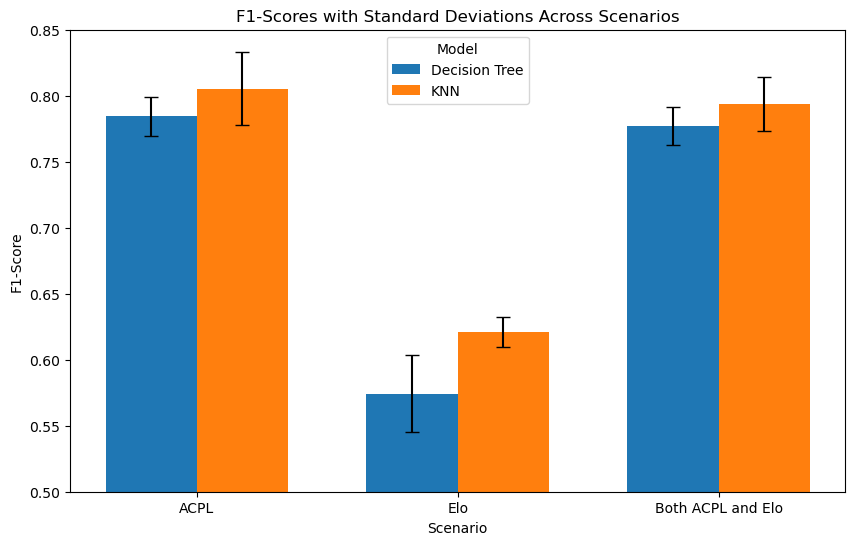

In [429]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the three scenarios
scenarios = ['ACPL', 'Elo', 'Both ACPL and Elo']
models = ['Decision Tree', 'KNN']

# Means and standard deviations for the scenarios
means = {
    'Decision Tree': [0.7845, 0.5742, 0.7770],
    'KNN': [0.8052, 0.6212, 0.7936]
}
std_devs = {
    'Decision Tree': [0.0147, 0.0290, 0.0145],
    'KNN': [0.0276, 0.0114, 0.0205]
}

# Create positions for the bars
x = np.arange(len(scenarios))  # Scenario positions
width = 0.35  # Width of the bars

# Create the plot
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar(x + i * width, means[model], width, yerr=std_devs[model], capsize=5, label=model)

# Customize the plot
plt.xticks(x + width / 2, scenarios)  # Adjust tick positions for group labels
plt.xlabel('Scenario')
plt.ylabel('F1-Score')
plt.title('F1-Scores with Standard Deviations Across Scenarios')
plt.legend(title='Model')
plt.ylim(0.5, 0.85)

# Display the plot
plt.show()